### testing darkview functions

In [168]:
import glob
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [169]:
files = glob.glob('*.jpg')
files

['cam1_arducam_exp02_image.jpg', 'cam1_arducam_exp02_imageb.jpg']

In [170]:
# read images, telling cv that they are grey already
imgs = [cv2.imread(f,  cv2.IMREAD_GRAYSCALE) for f in files]

In [171]:
cv2.IMREAD_UNCHANGED

-1

In [172]:
clip_limit = 2
tile_size = 8
tile_grid_size = np.array((tile_size, tile_size), dtype=np.int32)
clahe_1 = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
clahe_2 = cv2.createCLAHE(clipLimit=2*clip_limit, tileGridSize=tile_grid_size)
clahe_3 = cv2.createCLAHE(clipLimit=4*clip_limit, tileGridSize=tile_grid_size)

In [176]:
idx = 1
# output = imgs[idx].copy()  # not necessary - adds overhead
output_1 = clahe_1.apply(imgs[idx])
output_2 = clahe_2.apply(imgs[idx])
output_3 = clahe_3.apply(imgs[idx])

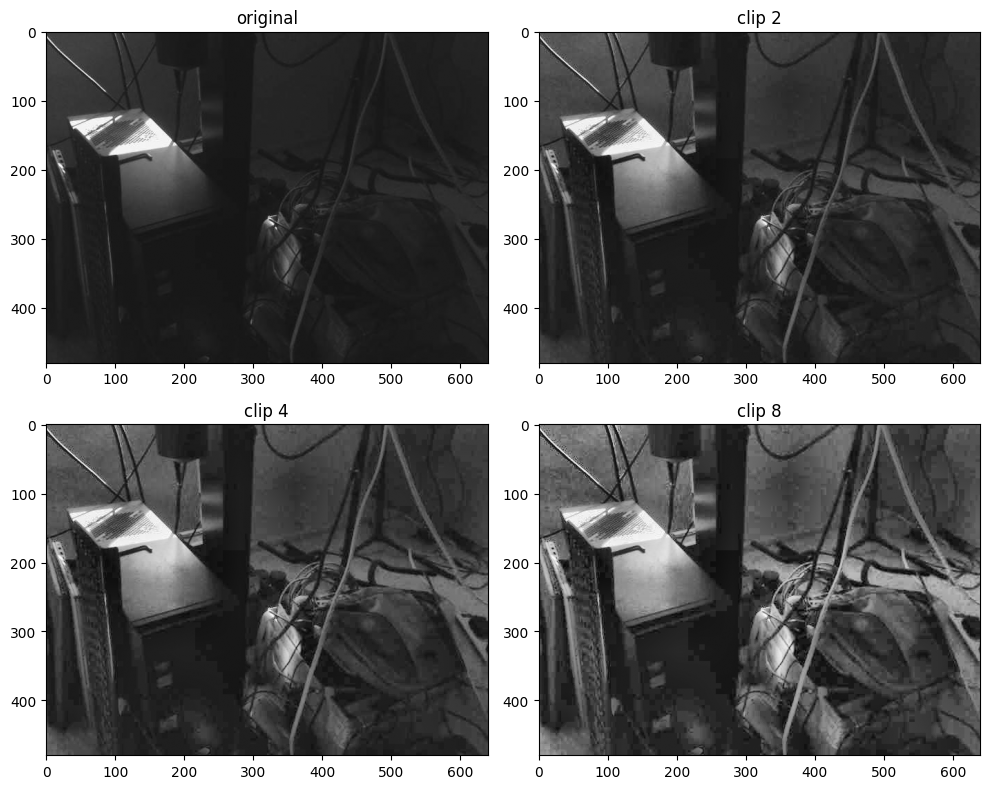

In [182]:
fig, axs = plt.subplots(2,2, figsize=(10,8))
ax = axs.flatten()
ax[0].imshow(imgs[idx], cmap='gray', vmin=0,vmax=256)
ax[1].imshow(output_1,cmap='gray',vmin=0,vmax=256)
ax[2].imshow(output_2,cmap='gray',vmin=0,vmax=256)
ax[3].imshow(output_3,cmap='gray',vmin=0,vmax=256)
for idy, label in enumerate(['original','clip 2','clip 4','clip 8']):
    pass
    ax[idy].set_title(label)
fig.tight_layout()
fig.savefig('test.png', bbox_inches='tight')